In [1]:
# Set proper path
import os
current_dir = os.getcwd()
if "notebooks" in current_dir:
    current_dir = os.chdir("../")

from src.models.train_model import load_dataset, load_model
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
model = load_model("final1-1", "ImprovedCNN")#load_model("Improved_CNN", "ImprovedCNN")
model.eval()

Model 'final1-1' loaded with architecture 'ImprovedCNN'


ImprovedCNN(
  (conv1): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): Sigmoid()
  (dropout): Dropout(p=0.25, inplace=False)
)

In [3]:
data_loader = load_dataset(5, "inference") #inference

In [4]:
sample_image, sample_mask, image_info = next(iter(data_loader))

In [4]:
sample_image = load_sample_image(2, 0, 77)
prediction = model(sample_image)

In [28]:
#data_loader = load_dataset(1, "inference")
#sample_image, sample_mask, image_info = next(iter(data_loader))
#prediction = model(sample_image)

sample_image = sample_image.numpy()
#sample_mask = sample_mask.numpy()
prediction = prediction.detach().numpy()

Text(0.5, 1.0, 'Data Based Simulation')

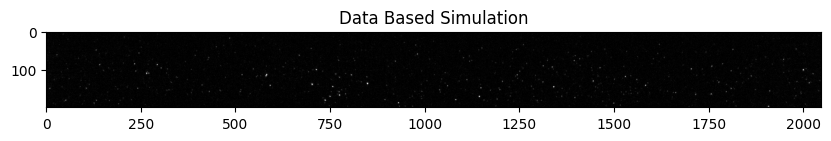

In [30]:
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(sample_image[0, 2, :, :], cmap="gray")
plt.title("Data Based Simulation")

In [35]:
batch=0

Text(0.5, 1.0, 'Prediction')

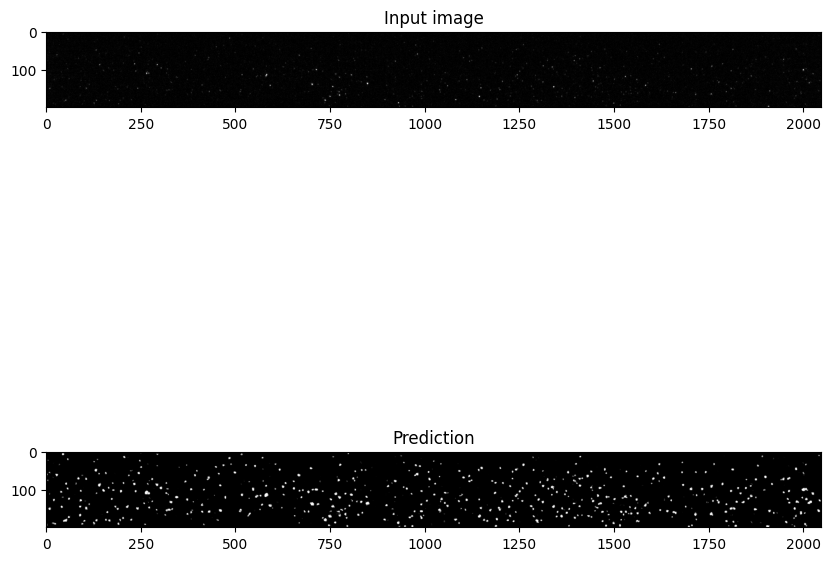

In [34]:
batch = 1
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(sample_image[0, 2, :, :], cmap="gray")
plt.title("Input image")
plt.subplot(2, 1, 2)
plt.imshow(prediction[0, 0, :, :], cmap="gray")
plt.title("Prediction")
#plt.colorbar()


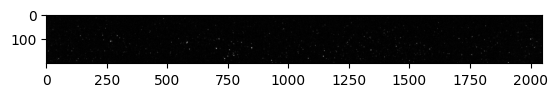

In [36]:
fig1 = plt.imshow(sample_image[batch, 2, :, :], cmap="gray")

In [3]:
def load_sample_image(batch, cam, frame):
    # Load images
    for i in range(0, 5):
        # Load png as torch tensor
        img = plt.imread("data/interim/batch" + str(batch) + "/cam" + str(cam) + "/B" + str(frame + i).zfill(5) + ".png")
                        #+ "/cam" + "3" + "/B" + str(50 + i - 2).zfill(5) + ".png")
        
        if i == 0:
            image_series = torch.zeros(5, img.shape[0], img.shape[1])

        img = torch.from_numpy(img)
        img = img.unsqueeze(0)

        image_series[i, :, :] = img

    return image_series.unsqueeze(0)

no_particles = load_sample_image(4, 3, 50)

In [5]:
from matplotlib.patches import Rectangle
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

def draw_squares(mask, scale_radius=1, edgecolor='r'):

    # Label connected components in the mask
    labels, num_labels = ndimage.label(mask)

    # Calculate the Euclidean distance transform of the labeled mask
    distances = ndimage.distance_transform_edt(mask)

    # Find the maximum position (centroid) of each labeled component
    centroids = ndimage.maximum_position(distances, labels, range(1, num_labels + 1))

    # Calculate the radius that surrounds all the points in the grouping
    max_distance = distances.max()
    radius = (max_distance*2 + 1) * scale_radius

    # Plot rectangles for each centroid
    for centroid in centroids:
        x = centroid[1] - radius
        y = centroid[0] - radius
        width = 2 * radius
        height = 2 * radius
        rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor=edgecolor)
        plt.gca().add_patch(rectangle)
    
    return num_labels

In [6]:
def plot_found_particles(mask, img = None, threshold_value=0.1, **kwargs):

    if img is None:
        img = mask
    
    mask = mask > threshold_value
    # Plot the mask
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='gray')

    num_labels = draw_squares(mask, **kwargs)
    plt.axis("off")
    plt.title(f"Found {num_labels} particles")


In [38]:
input_image = sample_image[batch, 2, :, :]
input_image = np.clip(input_image, 0, 0.5)

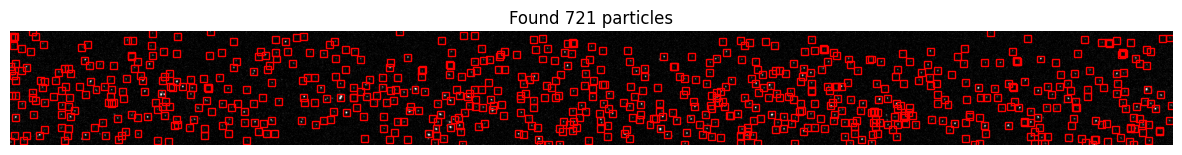

In [39]:
plot_found_particles(prediction[batch, 0, :, :], img=input_image, threshold_value=0.01, scale_radius=0.5)
plt.show()

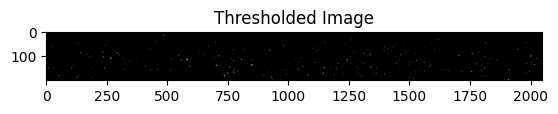

In [56]:
import scipy.ndimage as ndimage

threshold_value = 0.2
thresholded_image = sample_image > threshold_value
plt.imshow(thresholded_image[batch, 2, :, :], cmap="gray")
plt.title("Thresholded Image")
plt.show()


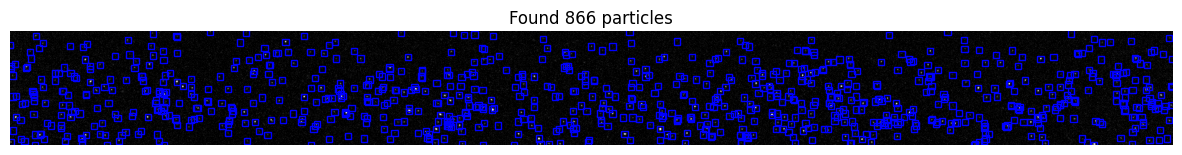

In [41]:
plot_found_particles(sample_image[batch, 2, :, :], img=input_image, threshold_value=0.1, edgecolor='b')

plt.show()

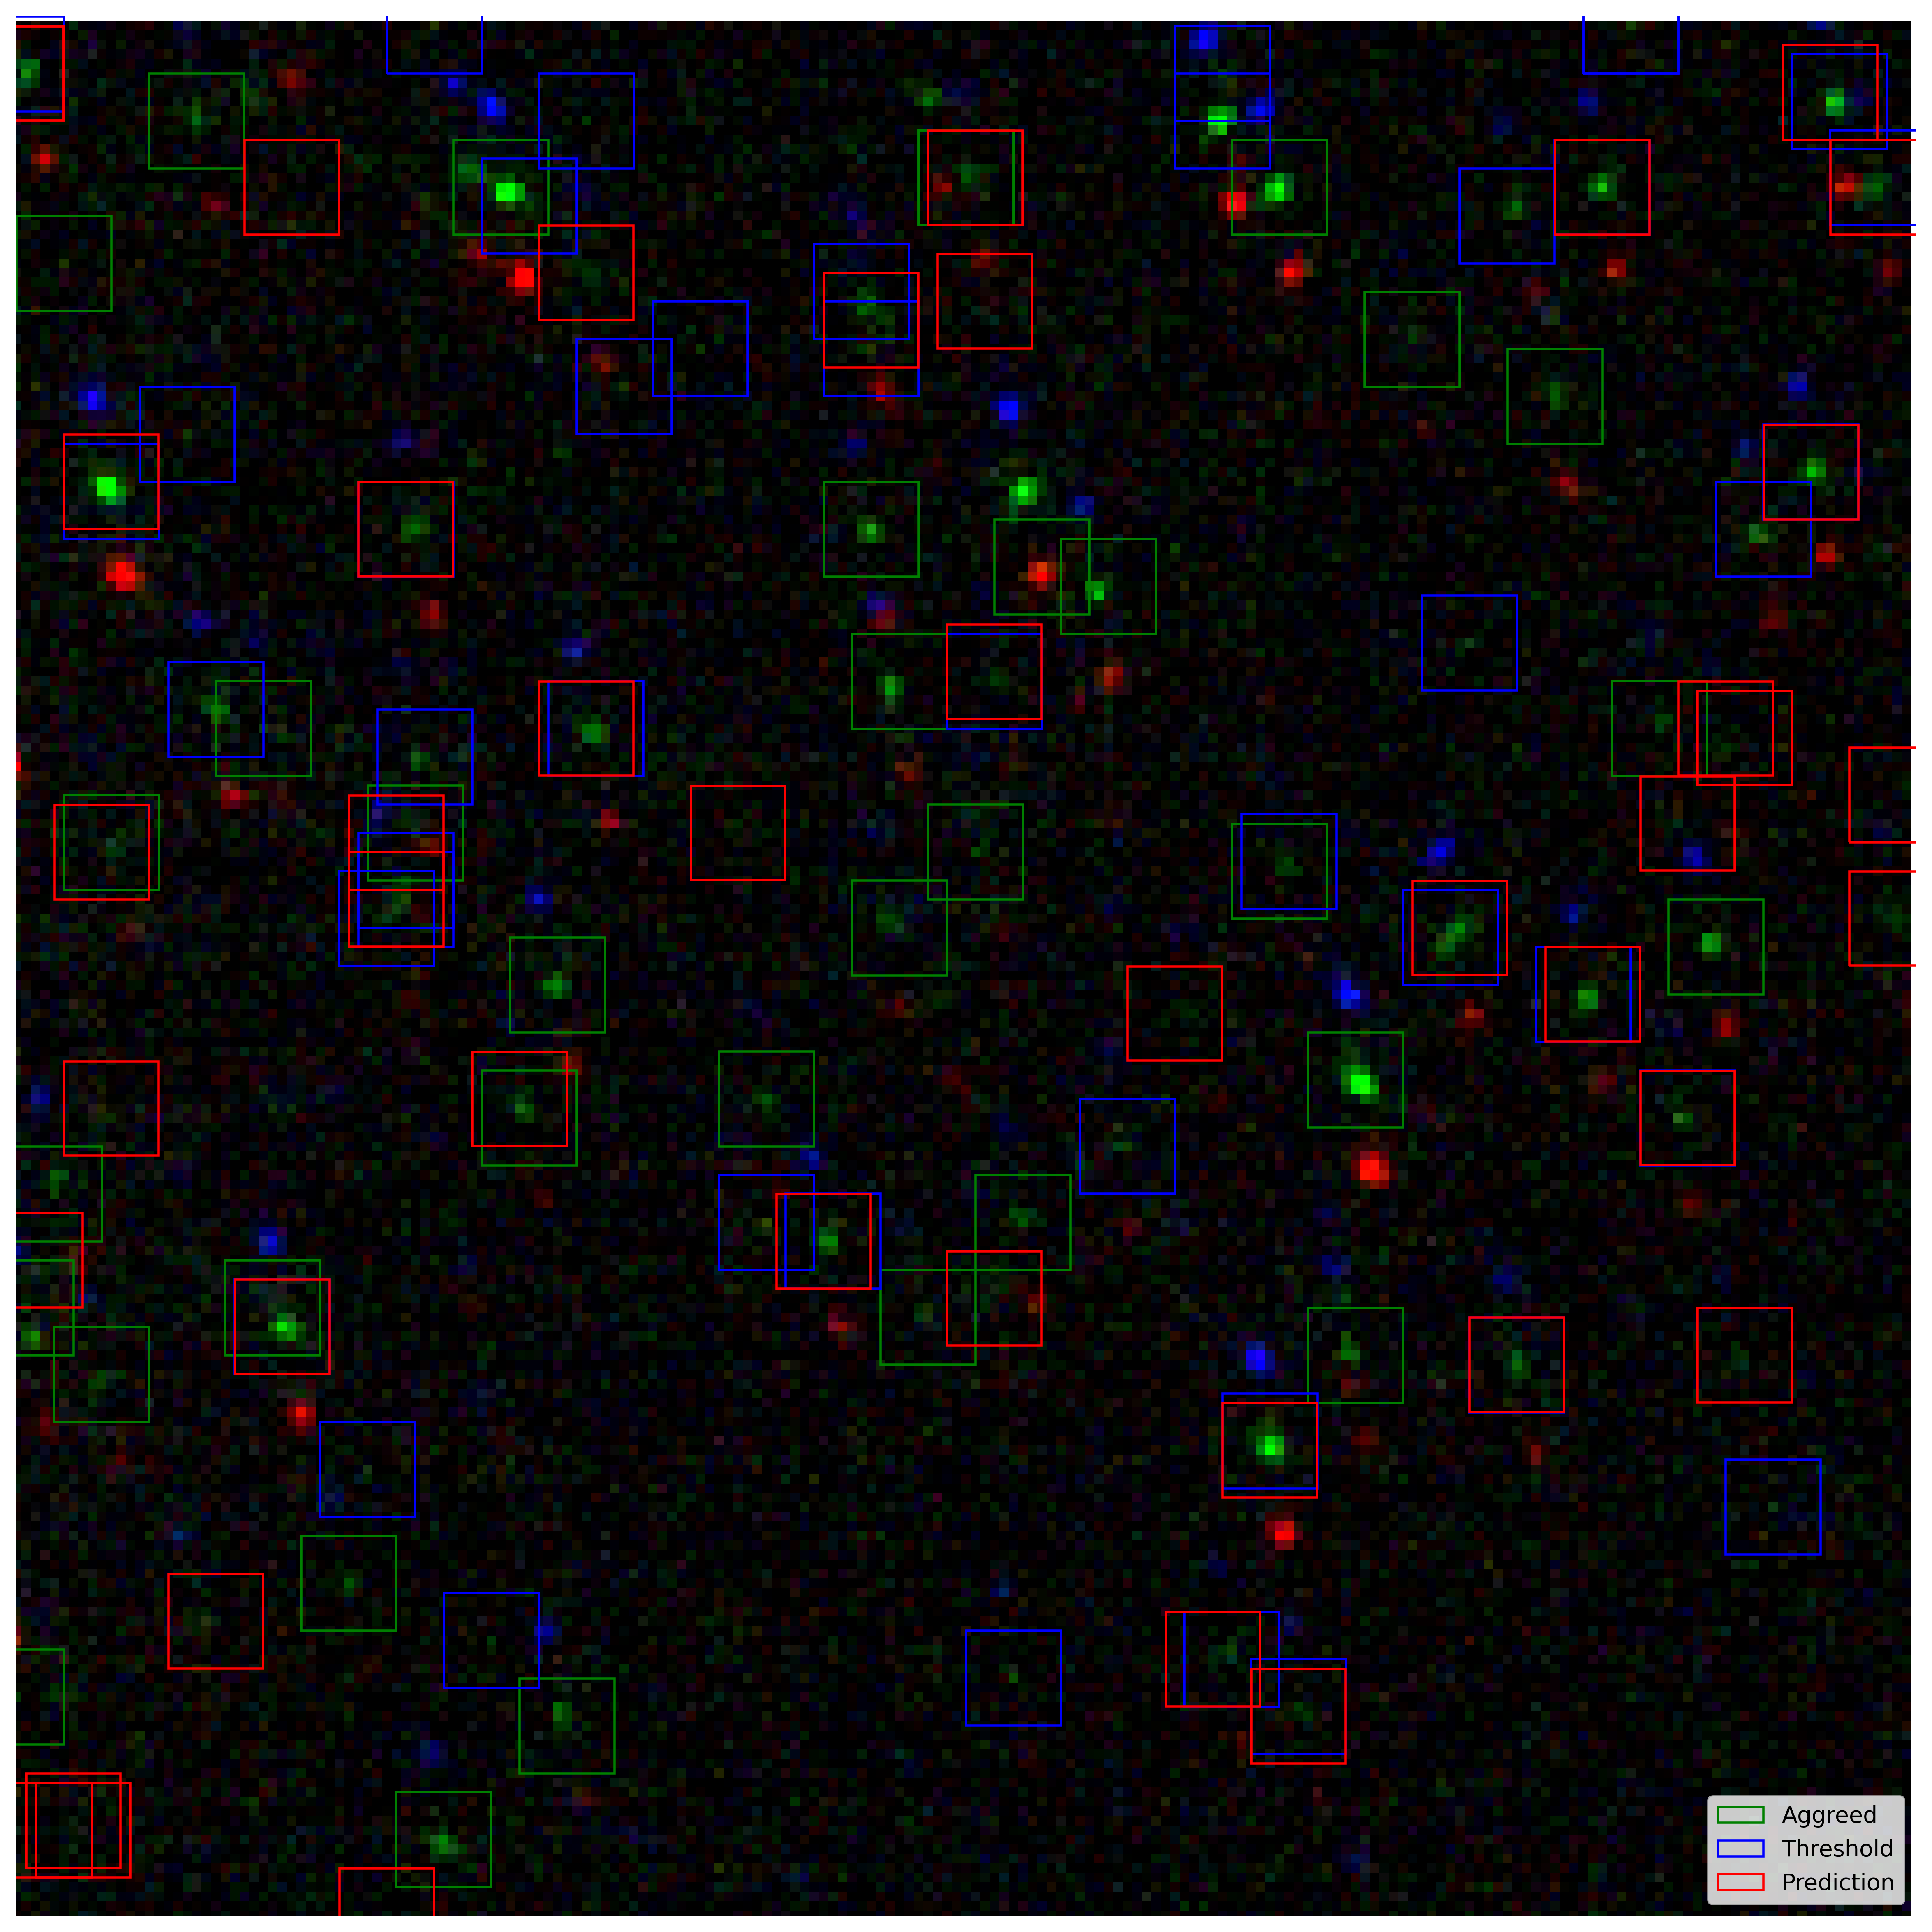

In [77]:
th = sample_image[batch, 2, :, :] > 0.1
pr = prediction[batch, 0, :, :] > 0.01
display_img = np.transpose(sample_image[batch, 1:4, :, :], (1, 2, 0))
display_img = np.clip(display_img, 0, 0.5) * 2

# Crop all
th = th[0:200, 0:200]
pr = pr[0:200, 0:200]
display_img = display_img[0:200, 0:200]

# Plot the mask
plt.figure(figsize=(15, 15), dpi=400)
#plt.imshow(input_image, cmap='gray')

plt.imshow(display_img, cmap="gray")
plt.axis("off")
#plt.title(f"Found {num_labels} particles")

# Label connected components in the mask
labelsth, num_labelsth = ndimage.label(th)

# Calculate the Euclidean distance transform of the labeled mask
distancesth = ndimage.distance_transform_edt(th)

# Find the maximum position (centroid) of each labeled component
centroidsth = ndimage.maximum_position(distancesth, labelsth, range(1, num_labelsth + 1))

# Calculate the radius that surrounds all the points in the grouping
max_distance = distancesth.max()
radiusth = (max_distance*2 + 1) * 1

labelspr, num_labelspr = ndimage.label(pr)

# Calculate the Euclidean distance transform of the labeled mask
distancespr = ndimage.distance_transform_edt(pr)

# Find the maximum position (centroid) of each labeled component
centroidspr = ndimage.maximum_position(distancespr, labelspr, range(1, num_labelspr + 1))

# Calculate the radius that surrounds all the points in the grouping
max_distance = distancespr.max()
radius = (max_distance*2 + 1) * 0.5

#agreed_centroids = list(set(centroidsth).intersection(centroidspr))
agreed_centroids = []
for centroidpr in centroidspr:
    for centroidth in centroidsth:

        for centroidcommon in agreed_centroids:
            if (np.linalg.norm(np.array(centroidcommon) - np.array(centroidpr)) <  7):
                try:
                    centroidspr.remove(centroidpr)
                except:
                    pass
                

        if np.linalg.norm(np.array(centroidth) - np.array(centroidpr)) <  10:
            
            
            centroidsth.remove(centroidth)

            try:
                centroidspr.remove(centroidpr)
                agreed_centroids.append(centroidth)
            except:
                pass

# remove agreed centroids from both lists
"""for agreed_centroid in agreed_centroids:
    centroidsth.remove(agreed_centroid)
    centroidspr.remove(agreed_centroid)"""

# plot agreed centroids
for centroid in agreed_centroids:
    x = centroid[1] - radiusth
    y = centroid[0] - radiusth
    width = 2 * radiusth
    height = 2 * radiusth
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='g')
    plt.gca().add_patch(rectangle)

# add labels for legend
rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='g', label="Aggreed")
plt.gca().add_patch(rectangle)

# Plot rectangles for each centroid
for centroid in centroidsth:
    x = centroid[1] - radiusth
    y = centroid[0] - radiusth
    width = 2 * radiusth
    height = 2 * radiusth
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='b')
    plt.gca().add_patch(rectangle)

# add labels for legend
rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='b', label="Threshold")
plt.gca().add_patch(rectangle)

# Plot rectangles for each centroid
for centroid in centroidspr:
    x = centroid[1] - radius
    y = centroid[0] - radius
    width = 2 * radius
    height = 2 * radius
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='r')
    plt.gca().add_patch(rectangle)

# add labels for legend
rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='r', label="Prediction")
plt.gca().add_patch(rectangle)

# do 10 image zooms
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.legend()
plt.savefig('reports/figures/th_vs_pr.png', bbox_inches='tight', pad_inches=0)
plt.show()

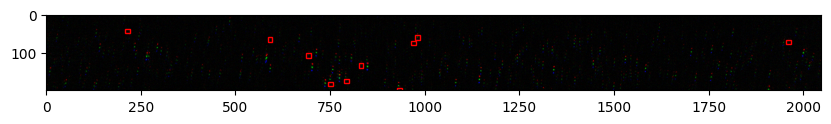

In [43]:
# plot 10 random particles only found by the network
import random

# Plot image stacked 3 channels
plt.figure(figsize=(10, 10))
# Transpose channels 0 and 2
display_img = np.transpose(sample_image[batch, 1:4, :, :], (1, 2, 0))
plt.imshow(display_img, cmap="gray")

random.shuffle(centroidspr)
for centroid in centroidspr[:10]:
    x = centroid[1] - radius
    y = centroid[0] - radius
    width = 2 * radius
    height = 2 * radius
    rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor='r')
    plt.gca().add_patch(rectangle)

plt.show()

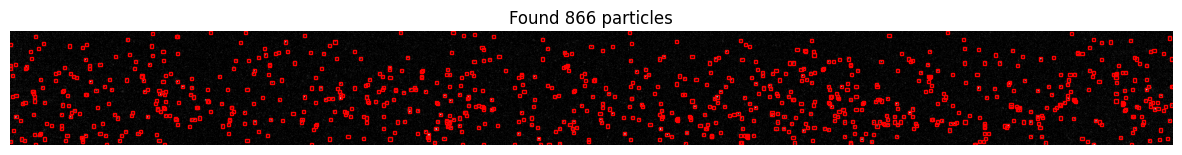

In [23]:
img = load_sample_image(2, 0, 77)
img = img.numpy()
img = img[0, 2, :, :]
imgclip = np.clip(img, 0, 0.5)

plot_found_particles(img, img=imgclip, threshold_value=0.1, scale_radius=0.5)
plt.show()


In [131]:
print(image_info, batch)

{'batch': ['batch1', 'batch2', 'batch1', 'batch1', 'batch1'], 'camera': ['0', '0', '1', '1', '0'], 'image': tensor([89, 77, 40, 64, 95])} 1


In [130]:
print("Number of agreed particles: ", len(agreed_centroids))
print("Number of threshold particles: ", len(centroidsth))
print("Number of predicted particles: ", len(centroidspr))

Number of agreed particles:  294
Number of threshold particles:  548
Number of predicted particles:  427



check the centroids that they do not aggree on to see which is spurious






















Text(0.5, 1.0, 'Prediction')

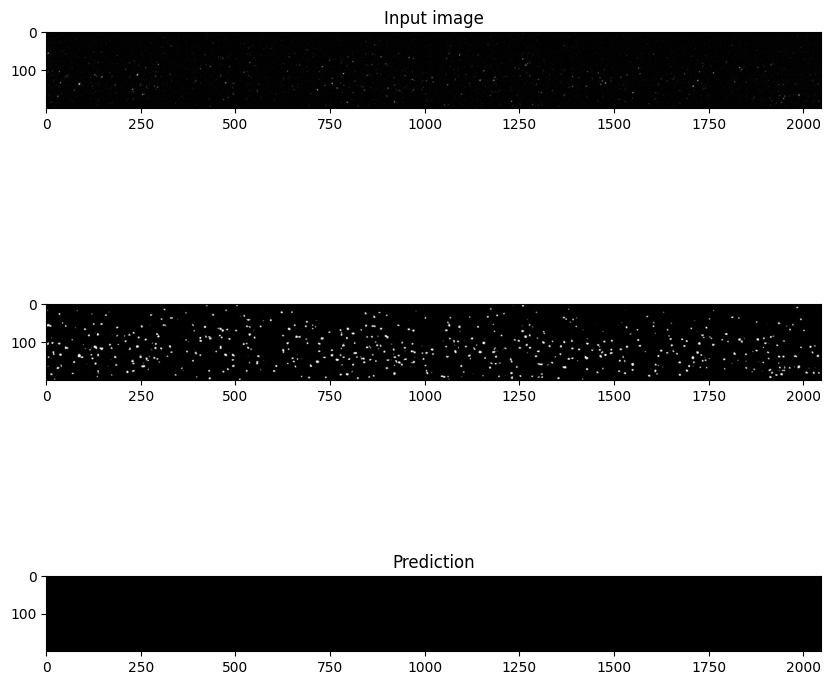

In [120]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.imshow(sample_image[0, 2, :, :], cmap="gray")
plt.title("Input image")
plt.subplot(3, 1, 2)
plt.imshow(prediction[0, 0, :, :], cmap="gray")
#plt.colorbar()
plt.subplot(3, 1, 3)
plt.imshow(sample_mask[0, 0, :, :], cmap="gray")
plt.title("Prediction")

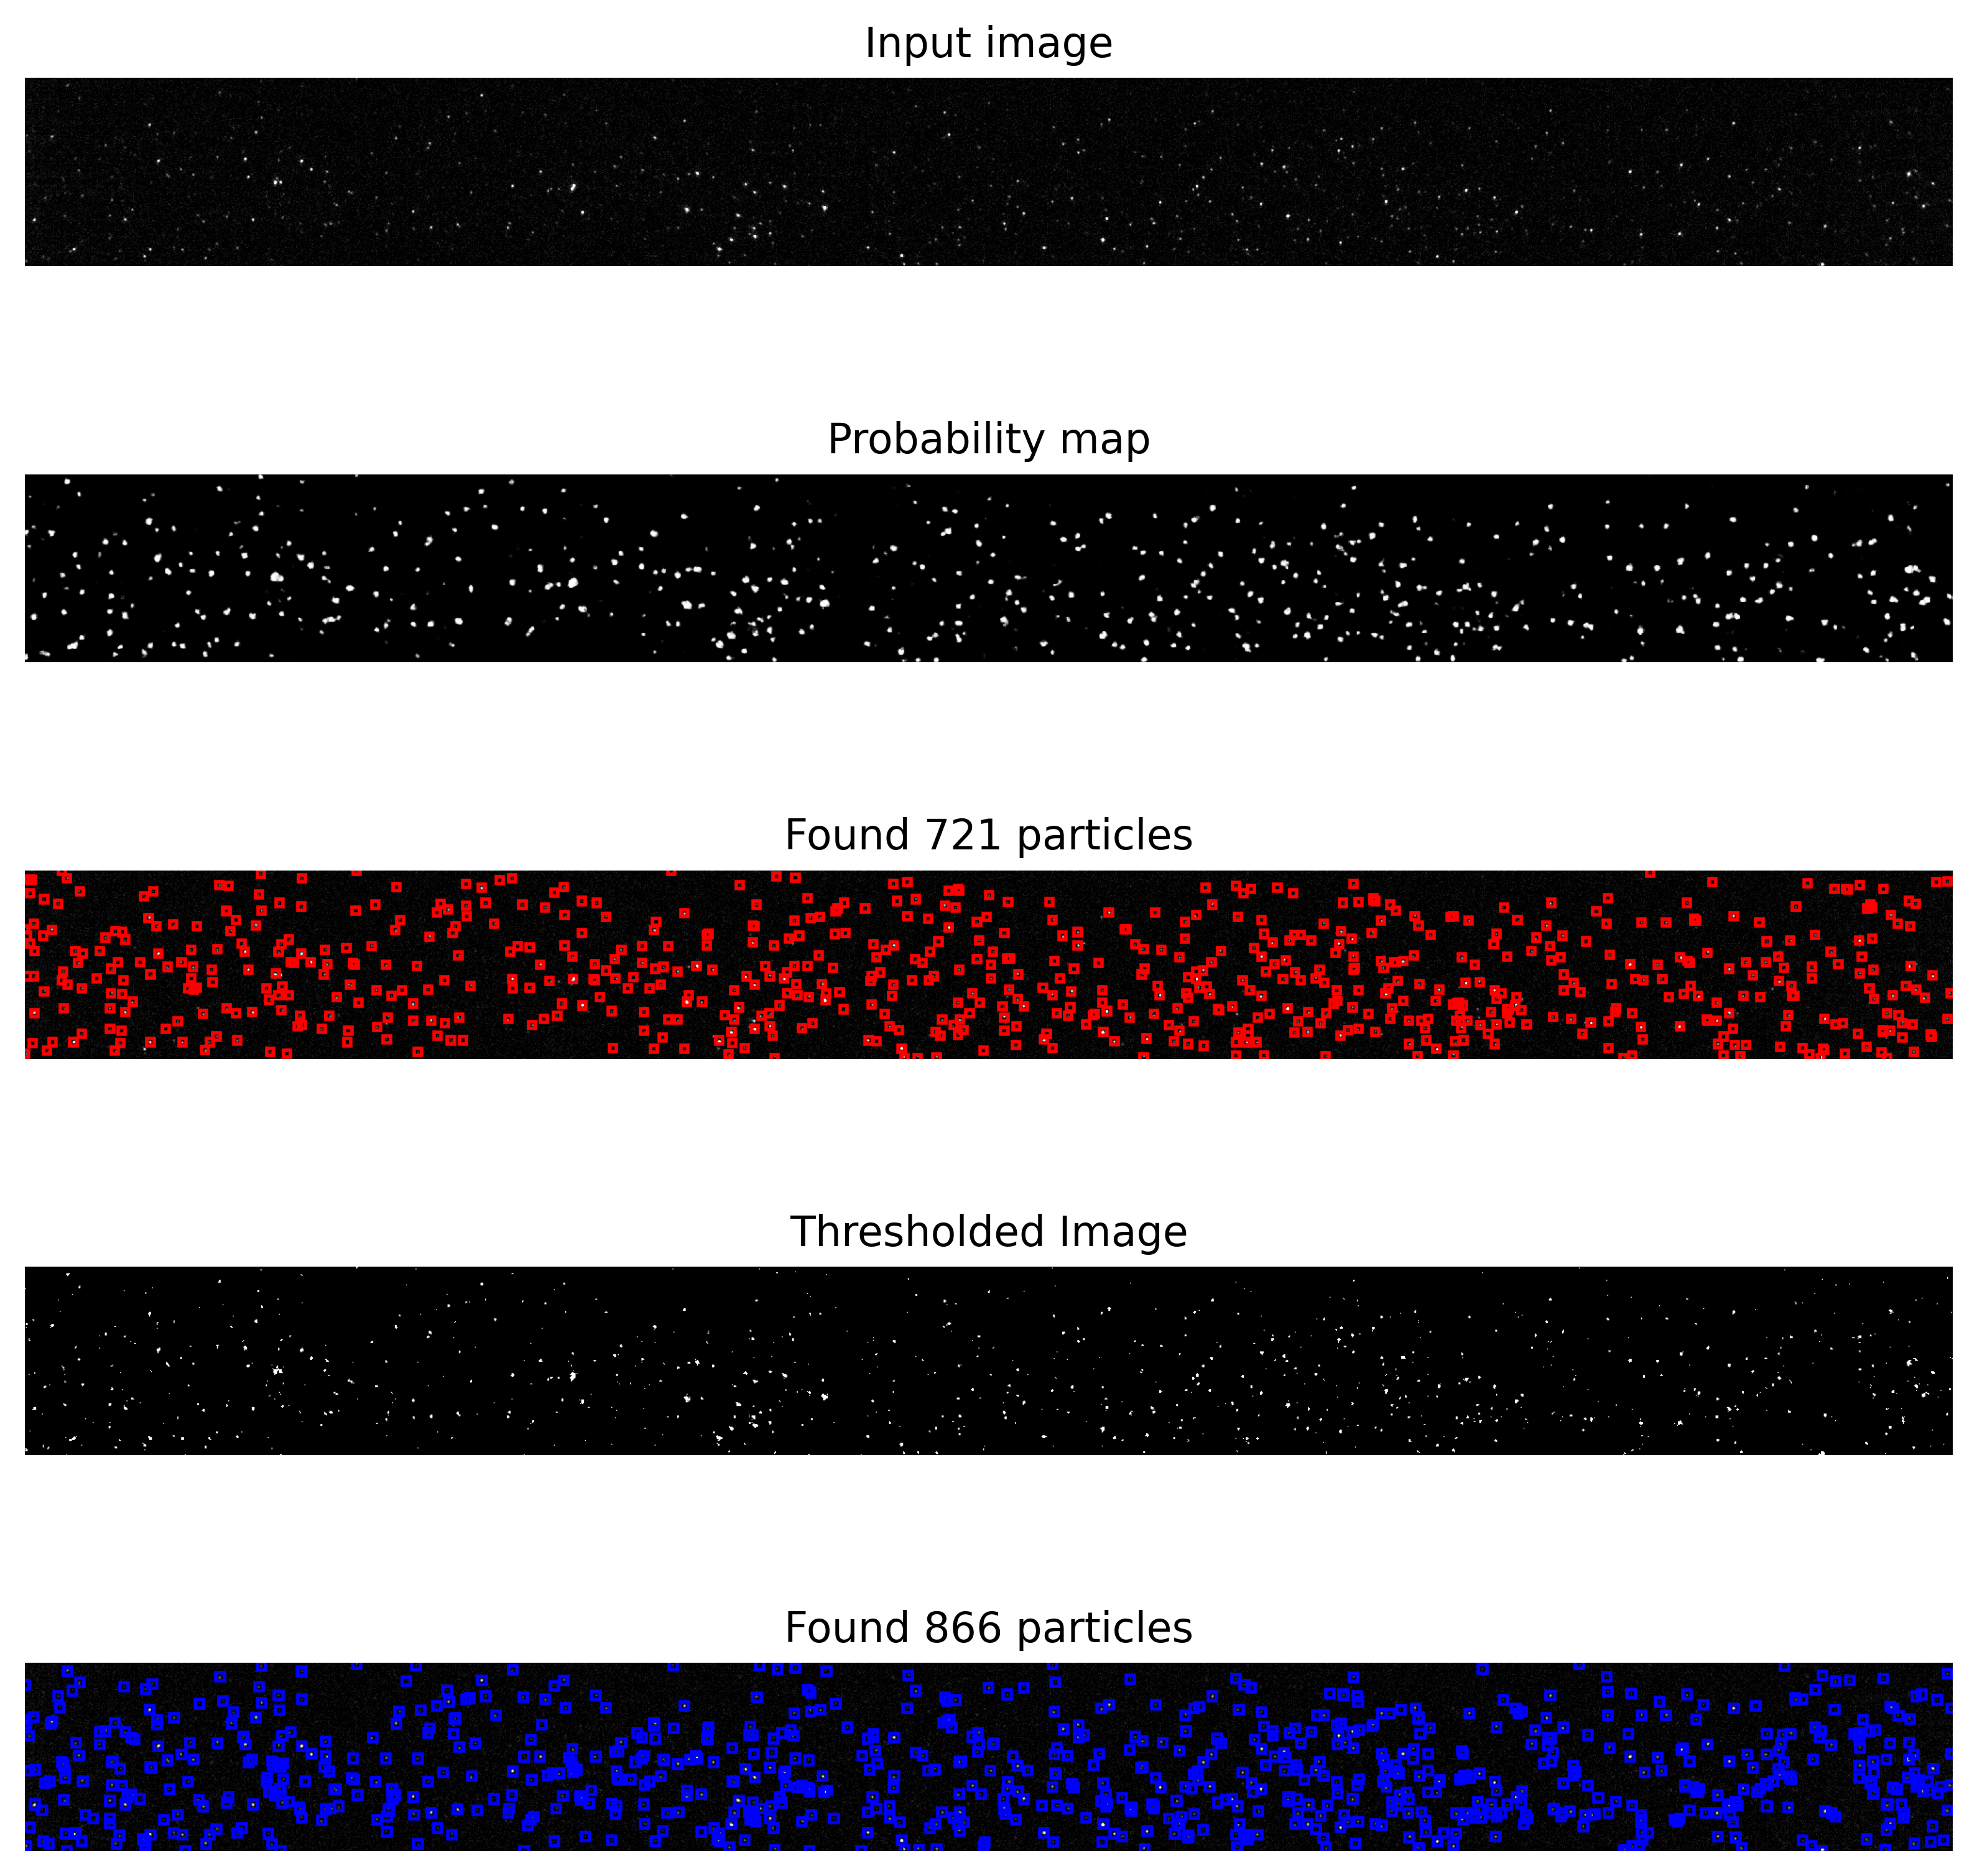

In [27]:
display_img = sample_image[0, 2, :, :]
display_img = np.clip(display_img, 0, 0.5) * 2
batch = 0

plt.figure(figsize=(10, 10), dpi=400)
plt.subplot(5, 1, 1)
plt.imshow(display_img, cmap="gray")
plt.title("Input image")
plt.axis("off")
plt.subplot(5, 1, 2)

plt.imshow(prediction[batch, 0, :, :].detach().numpy(), cmap="gray")
plt.title("Probability map")
plt.axis("off")
#plt.colorbar()
plt.subplot(5, 1, 3)

# Plot the mask
#plt.figure(figsize=(15, 15))
plt.imshow(display_img, cmap='gray')

num_labels = draw_squares(prediction[batch, 0, :, :].detach().numpy() > 0.01, scale_radius=0.3)
plt.axis("off")
plt.title(f"Found {num_labels} particles")
plt.subplot(5, 1, 4)
threshold_value = 0.1
thresholded_image = sample_image > threshold_value
plt.imshow(thresholded_image[batch, 2, :, :], cmap="gray")
plt.axis("off")
plt.title("Thresholded Image")

plt.subplot(5, 1, 5)
plt.imshow(display_img, cmap='gray')
num_labels = draw_squares(thresholded_image[batch, 2, :, :], scale_radius=0.8, edgecolor='b')
plt.axis("off")
plt.title(f"Found {num_labels} particles")

plt.savefig('reports/figures/compare.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [28]:
pred_no_particles = model(no_particles).detach().numpy()[0,0,:,:]

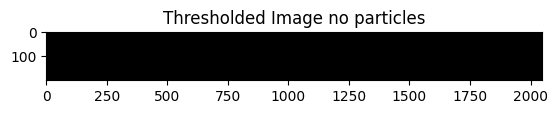

In [8]:
threshold_value = 0.2
thresholded_image = no_particles > threshold_value
plt.imshow(thresholded_image[0, 2, :, :], cmap="gray")
plt.title("Thresholded Image no particles")
plt.show()

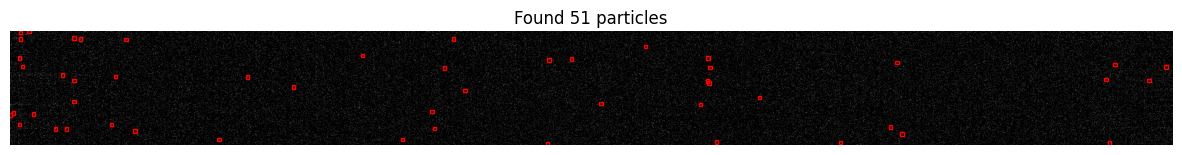

In [29]:
no_particles = load_sample_image(4, 3, 11)
plot_found_particles(no_particles[0,2,:,:], img=no_particles[0,2,:,:], threshold_value=0.1)

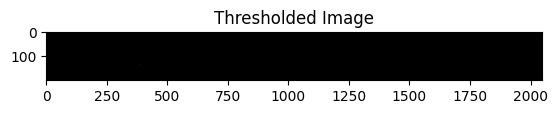

In [30]:
import scipy.ndimage as ndimage

threshold_value = 0.1
plt.imshow(pred_no_particles, cmap="gray")
plt.title("Thresholded Image")
plt.show()

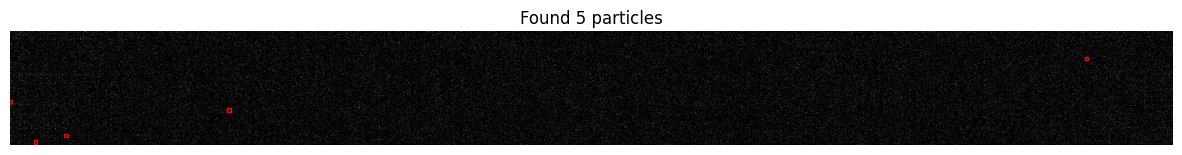

In [31]:
plot_found_particles(pred_no_particles, no_particles[0,2,:,:], threshold_value=0.01)

plt.show()